# Importing analysis & visualization libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turning project folder into string path 
path = r'C:\Users\keirr\11-2020 Instacart Basket Analysis'

In [3]:
# Importing orders_products_agg.pkl dataset with path
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

In [4]:
# Checking imported df
ords_prods_cust.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_kids,married_single,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Contents
## 1. Creating Bar Charts 
### a) Bar Chart: 'orders_day_of_week' column
### b) Bar Chart: 'loyalty_flag' column
## 2. Creating Histograms
### a) Histogram: 'prices' column
### b) Histogram: 'order_hour_of_day'
## 3. Creating Scatterplots
### a) Scatterplot: 'age' & 'income' columns
## 4. Creating Line Charts 
### a) Line Chart: 'orders_day_of_the_week' & 'prices' columns
### b) Line Chart: 'orders_hour_of_day' & 'prices' columns
### c) Line Chart: 'age' & 'num_of_kids'

# 1. Creating Bar Charts with ords_prods_agg 

## a) Bar Chart: 'orders_day_of_week' column

<Axes: xlabel='orders_day_of_the_week'>

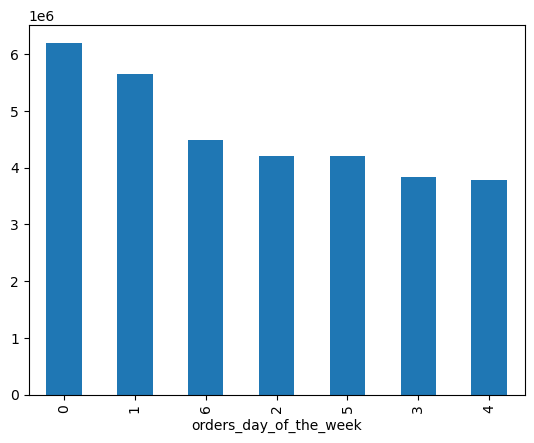

In [5]:
# Exploring 'orders_day_of_week' via bar chart
ords_prods_cust['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

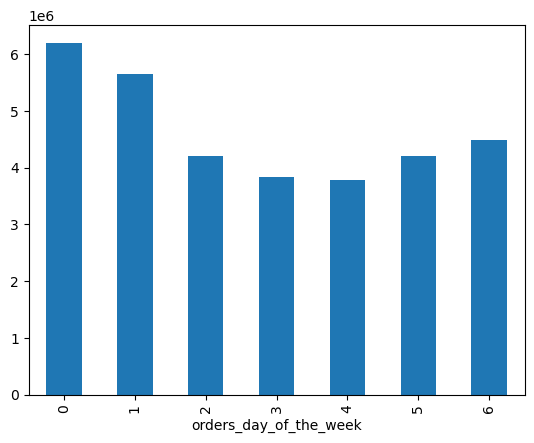

In [6]:
# Sorting index of bar chart
ords_prods_cust['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

Text(0, 0.5, 'Frequency')

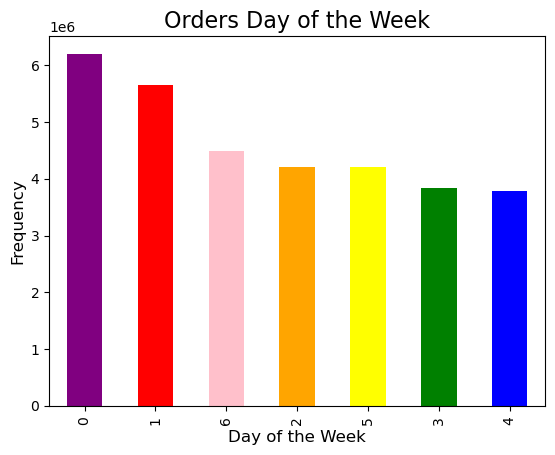

In [7]:
# Adding color to visualization & saving to 'bar' object for future save
bar = ords_prods_cust['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Adding title, labels, etc.
plt.title('Orders Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [8]:
# Saving 'bar' image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## b) Bar Chart: 'loyalty_flag' column

<Axes: xlabel='loyalty_flag'>

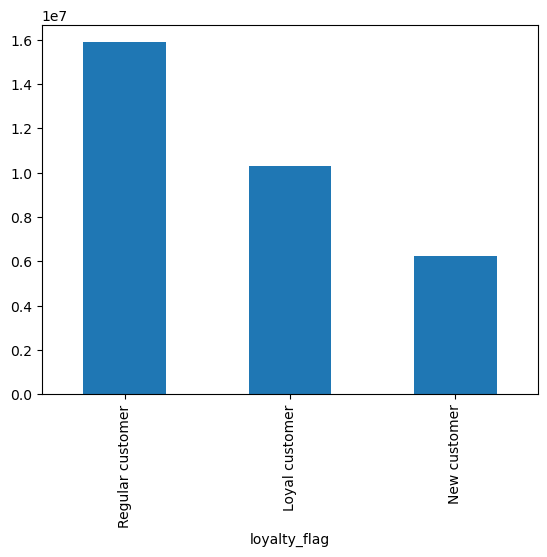

In [9]:
# Exploring 'loyalty_flag' via bar chart
ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

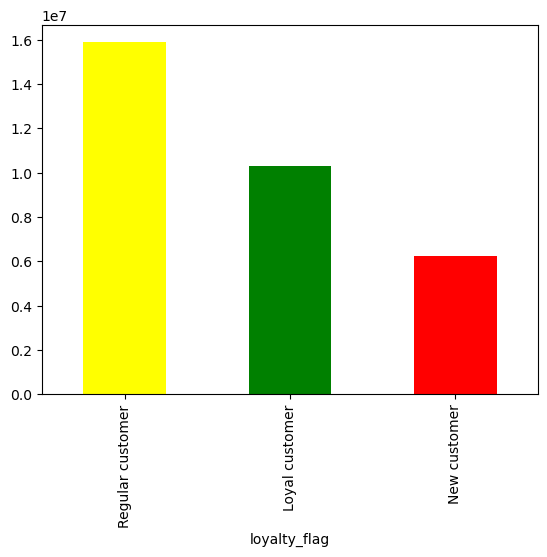

In [10]:
# Adding color & saving to 'bar_2' object for future save
bar_2 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['yellow', 'green', 'red'])

Text(0, 0.5, 'Frequency')

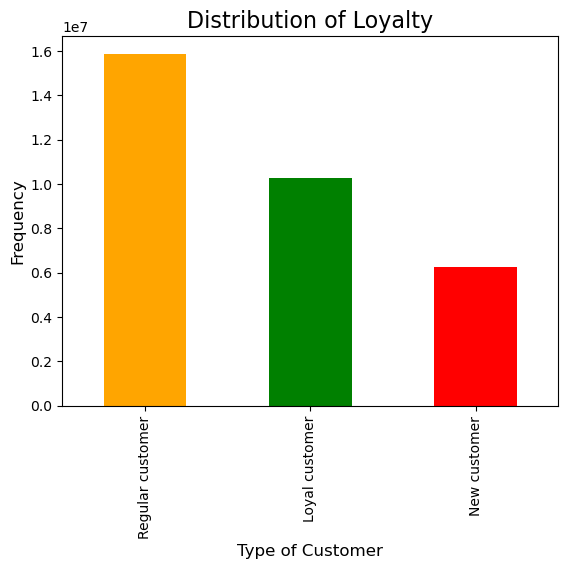

In [12]:
# Yellow is too bright, switching to orange
# Overwriting 'bar_2'
bar_2 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['orange', 'green', 'red'])

# Adding title, labels, etc.
plt.title('Distribution of Loyalty', fontsize=16)
plt.xlabel('Type of Customer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [13]:
# Saving 'bar_2' image
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# 2. Creating Histograms

## a) Histogram: 'prices' column

<Axes: ylabel='Frequency'>

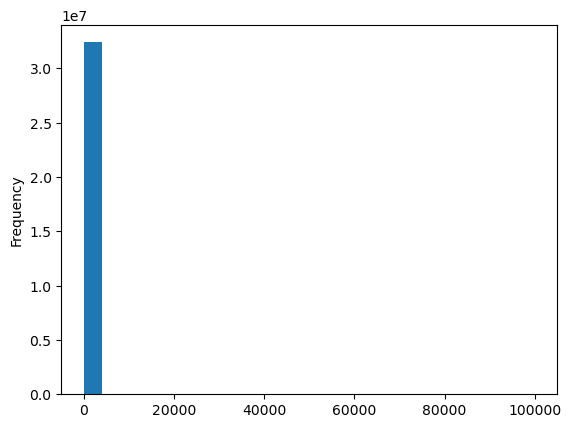

In [14]:
# Creating histogram of 'prices' column
ords_prods_cust['prices'].plot.hist(bins = 25)

### Something seems off, only one column is being represented, need to check basic stats of column

In [15]:
# Checking statistics on 'prices' column
ords_prods_cust['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
# Checking mean of 'prices'
ords_prods_cust['prices'].mean()

11.980225638383438

In [17]:
# Checking median of 'prices'
ords_prods_cust['prices'].median()

7.4

In [18]:
# Checking max of 'prices'
ords_prods_cust['prices'].max()

99999.0

### Insights: something is obviously off with the data, extreme value of 9999.00 causing issues with distrubution.

## Utilizing Scatterplot to find outliers in 'prices' column

In [19]:
# Creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

Error in callback <function flush_figures at 0x00000175E0A6D800> (for post_execute):


KeyboardInterrupt: 

In [20]:
# Further exploratory analysis to check discrepency in data
ords_prods_cust.loc[ords_prods_cust['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_kids,married_single,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [21]:
# Converting 'prices' values > 100 to 'Nan' values
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [22]:
# Re-checking max of 'prices' column
ords_prods_cust['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

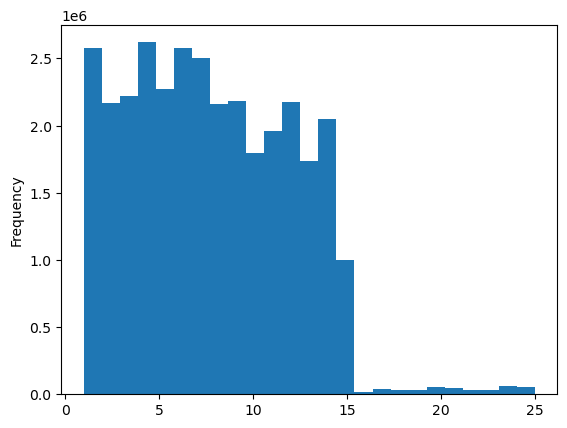

In [23]:
# Creating histogram of 'prices' column
hist = ords_prods_cust['prices'].plot.hist(bins = 25)

Text(0, 0.5, 'Frequency')

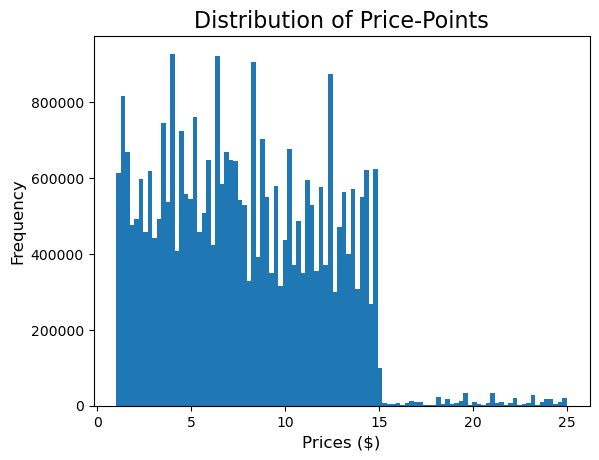

In [25]:
# Increasing bins to 70 for more granularity 
hist_2 = ords_prods_cust['prices'].plot.hist(bins = 100)

# Adding title, labels, etc.
plt.title('Distribution of Price-Points', fontsize=16)
plt.xlabel('Prices ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [26]:
# Saving 'hist_2' image
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## b) Histogram: 'order_hour_of_day'

<Axes: ylabel='Frequency'>

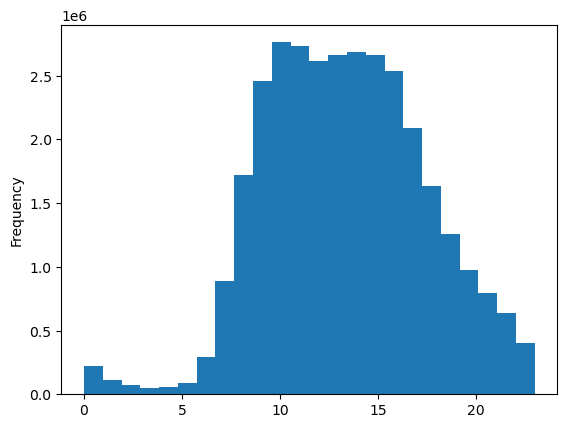

In [27]:
ords_prods_cust['order_hour_of_day'].plot.hist(bins =24)

Text(0, 0.5, 'Frequency')

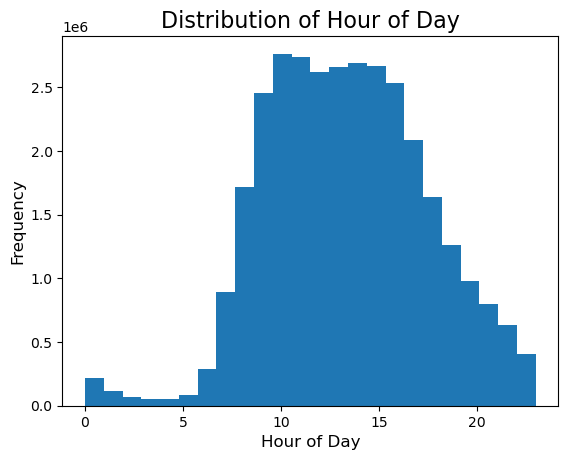

In [28]:
hist_3 = ords_prods_cust['order_hour_of_day'].plot.hist(bins =24)

# Adding title, labels, etc.
plt.title('Distribution of Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

### Insights: with there being 24 hours in a day, most orders placed = 9am-10am, orders slightly dip after noon, a small influx 2pm-3pm, then steadty decline in orders until 5-6am

In [29]:
# Saving 'hist_3' image
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

# 3. Creating Scatterplot

## a) Scatterplot: 'age' & 'income' columns

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='income'>

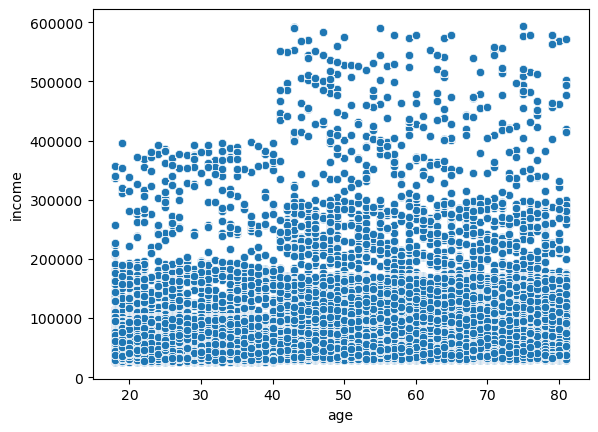

In [35]:
# Creating scatterplot
sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)

### Insights: majority of population (~50%) sit within 1-20k region of income with the cap being 40k(outliers), when customer age >= 40 income increases into cap of 60k(outliers)

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


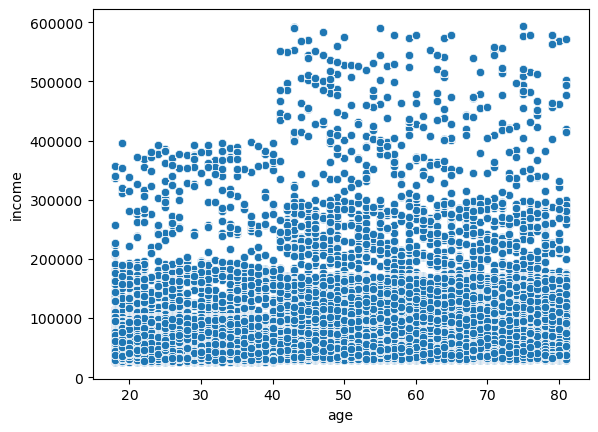

In [36]:
# Saving 'scatterplot' as object for future save
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)

In [37]:
# Saving 'scatterplot' image
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_age_income.png'))

# 4. Creating Line Charts

## a) Line Chart: 'orders_day_of_week' & 'prices' columns

### Creating sample of data for line chart

In [30]:
# Setting seed & creating 'dev' list for boolean values
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [31]:
# Checking list of boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
# Creating 'big' and 'small' df to set values to
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [41]:
len(ords_prods_cust)

32404859

In [42]:
# Checking if 'big' and 'small' match 
len(big) + len(small)

32404859

In [33]:
# Reducing sample to include necessary columns for line chart
df_2 = small[['orders_day_of_the_week','prices']]

In [45]:
# Calling df
df_2

,orders_day_of_the_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0, 0.5, 'Prices ($)')

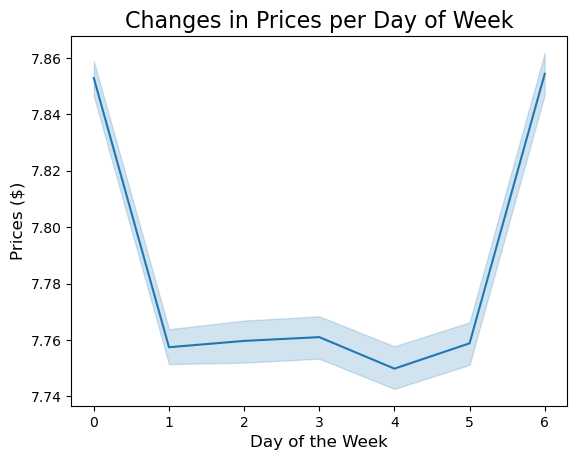

In [34]:
# Creating line chart with df_2
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

# Adding title, labels, etc.
plt.title('Changes in Prices per Day of Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Prices ($)', fontsize=12)

In [35]:
# Saving 'line' image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_prices.png'))

## b) Line Chart: 'order_hour_of_day' & 'prices' columns

In [36]:
# Since sample has already been created, now just reducing sample to include columns necessary for line chart
df_3 = small[['order_hour_of_day','prices']]

In [49]:
# Calling df
df_3

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0, 0.5, 'Prices ($)')

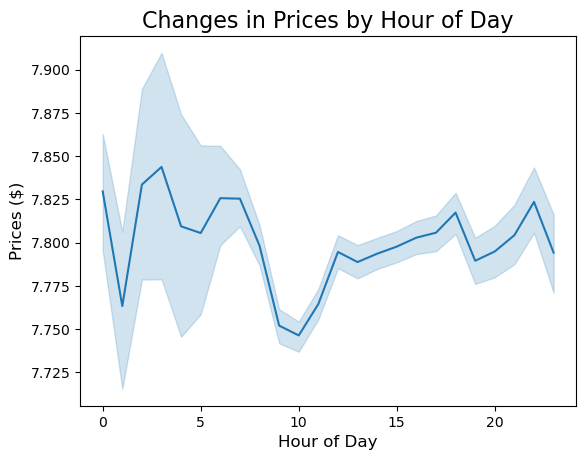

In [37]:
# Creating line chart with df_3
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

# Adding title, labels, etc.
plt.title('Changes in Prices by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Prices ($)', fontsize=12)

In [38]:
# Saving 'line_2' image
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_how_prices.png'))

## c) Line Chart: 'age' & 'num_of_kids'

In [39]:
# Since sample has already been created, now just reducing sample to include columns necessary for line chart
age_num_kids = small[['age','num_of_kids']]

In [54]:
# Calling df
age_num_kids

,age,num_of_kids
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0, 0.5, 'Family Status')

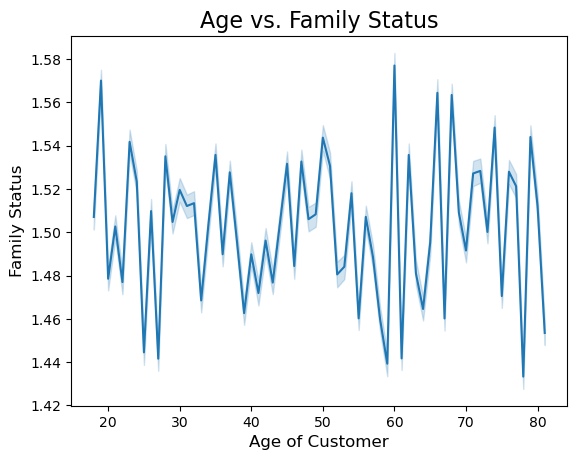

In [40]:
# Creating line chart with age_num_kids
line_3 = sns.lineplot(data = age_num_kids, x = 'age',y = 'num_of_kids')

# Adding title, labels, etc.
plt.title('Age vs. Family Status', fontsize=16)
plt.xlabel('Age of Customer', fontsize=12)
plt.ylabel('Family Status', fontsize=12)

### Insights: No clear correlation between age and number of kids, seems to be scattered, but can explore deeper into data

In [41]:
# Saving 'line_3' image
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_num_kids.png'))